# Twitter Media Monitoring – Sentiment Analysis

Project ini bertujuan melakukan media monitoring berbasis Twitter dengan analisis sentimen untuk memahami kecenderungan opini publik terhadap suatu topik.  
Project ini dikembangkan sebagai bagian dari mata kuliah Pemrosesan Teks Praktik dan disusun sebagai portofolio analisis data berbasis teks.


## Load Dataset
Dataset yang digunakan merupakan data Twitter hasil crawling dengan jumlah 959 tweet.  
Data telah melalui proses pelabelan manual ke dalam dua kelas sentimen, yaitu positif dan negatif.

In [ ]:
import pandas as pd
import numpy as np

# Sambung ke drive
from google.colab import drive
drive.mount('/content/drive')

# Menentukan path dan nama file yang sudah diproses
# data uda di crawling dikelas dan disimpan dalam drive, jadi tinggal baca aja
df = pd.read_csv('/content/drive/MyDrive/PTT 2025/taeil_raw_label.csv')

# Menampilkan beberapa baris pertama dari DataFrame yang sudah diproses
print("DataFrame dari file Raw:")
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame dari file Raw:


,conversation_id_str,created_at,full_text,label,tweet_url
0,1990966463406936553,Wed Nov 19 02:12:49 +0000 2025,Rill perusak KPop tuh SM YG entah agensi pengg...,0,https://x.com/undefined/status/199096646340693...
1,1988909199930142791,Thu Nov 13 09:58:00 +0000 2025,TAEIL NCT GAK PERNAH DI GERUS TERUS TERUSAN KE...,0,https://x.com/undefined/status/198890919993014...
2,1988533968157671538,Wed Nov 12 09:29:04 +0000 2025,@okeyowkey oh bapaknya si ha3rin ya(?) sebenar...,0,https://x.com/undefined/status/198853953054720...
3,1987547437326848095,Mon Nov 10 13:21:46 +0000 2025,@emxrwld Taeil abis kena kasus lgsg dihujat fa...,0,https://x.com/undefined/status/198787331641429...
4,1987232748621496811,Sun Nov 09 17:34:39 +0000 2025,@azaviarevalina @BadutTae @nvmindz Setuju kont...,0,https://x.com/undefined/status/198757457063175...


In [ ]:
#Jumlah Data Hasil Crawling
data_amt = len(df)
print(f"jumlah data yang ditemukan: {data_amt}")

jumlah data yang ditemukan: 959


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.5 MB/s eta 0:00:00


## Preprocessing Teks

Tahap preprocessing dilakukan untuk membersihkan teks tweet dari noise agar informasi yang relevan dapat diproses oleh model.  
Proses ini meliputi pembersihan karakter tidak penting, normalisasi teks, dan tokenisasi.


In [ ]:
# library
import re
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# stemmer dan stopword (sastrawi)
stemmer = StemmerFactory().create_stemmer()
stop_factory = StopWordRemoverFactory()
stopwords_ind = set(stop_factory.get_stop_words())

# stopword manual
stopwords_tambahan = {
    'yang','dan','di','ke','dari','pada','untuk','dengan','atau','karena','agar','sehingga','sebagai','juga',
    'ada','oleh','dalam','dapat','setelah','sebelum','hingga','supaya','kalau','bila','ketika','sementara',
    'sedangkan','meskipun','walaupun','sebab','hingga','kembali','antara','sejak','selama','para','setiap','sama',
    'banget','jadi','kamu','nang','kgaeul','bang',
    'mereka','kita','anda','beliau','milik','dirinya','sendiri','diri','tersebut',
    'lain','semua','bagi','kepada','bahwa','yaitu','yakni','tentang','buat',
    'tuh','gitu','kayak','kaya','emang','emg','malah','sampe','sampai','bareng','barengan',
    'kali','kayanya','klo','klu','klw','biar','daripada','padahal','doang','cuma','cmn',
    'lah','kah','tah','pun','nya','nyaa','mana','mu','ku',
    'deh','dong','kan','mah','nih','loh','sih','kok','ko','koq','toh','ya','eh','ayo','amp',
    'oh','oke','ok','yah','yaa','yaaah','yaaa','cie','ciee',
    'wkwk','wk','wkwkwk','haha','hahaha','hehe','hehehe','hihihi','huhu','huh',
    'awokawokawok','akwoakwowk','wjsjdhiss','wjsjdhis','vshshs','hwhwhw',
    'anj','anjir','anjay','anjirr','anjirrr','anjr','astaga','anjrit','asu',
    'tai','taik','kampret','goblok','tolol','bego','anjg','bangsat','memek','kontol','goblog',
    'yg','aja','jd','dlm','trs','trus','tp','tpi','krn','karna','utk','dgn','dr','jg','jgk','bkn',
    'sm','tmn','temen','bro','sis','gan','sob',
    'rt','via','cc','amp','pon','wp','med','hi','o','btw','yuk','ehh',
    'ff','ig','fb','wa','yt','ytb','tw','twt','tiktok','tokped','shopee','grab','gojek',
    'bt','idk','imo','jwv','rp','lol','lmao','omg','wtf','xixixi'
}

stop_words_final = stopwords_ind.union(stopwords_tambahan)

# normalisasi manual
normalisasi_kamus = {
    'gk':'tidak','ga':'tidak','gak':'tidak','nggak':'tidak','tdk':'tidak','engga':'tidak','ngga':'tidak','tak':'tidak','ta':'tidak',
    'dr':'dari','drg':'dari','yg':'yang','dgn':'dengan','aja':'saja','blm':'belum','udh':'sudah','udah':'sudah','saia':'saya',
    'klo':'kalau','kalo':'kalau','sm':'sama','tp':'tapi','trs':'terus','bgt':'banget','ndak':'tidak','krn':'karena','sy':'saya',
    'gw':'saya','gue':'saya','gua':'saya','loe':'kamu','lo':'kamu','lu':'kamu','km':'kamu','makasih':'terima kasih','thanks':'terima kasih',
    'pls':'tolong','plis':'mohon','digituin':'gitu','seliwer':'lewat','org':'orang','pd':'pada','bro':'teman','sis':'teman',
    'jd':'jadi','jg':'juga','bs':'bisa','tsb':'tersebut','trnyta':'ternyata','gmn':'bagaimana','asbunnya':'asal bicara',
    'knp':'kenapa','knpa':'kenapa','dpt':'dapat','utk':'untuk','hrsnya':'harus','smoga':'semoga','dapet':'dapat',
    'dapetin':'mendapatkan','nyari':'mencari','nyenggol':'senggol','ngurus':'mengurus','ngurusin':'mengurus','nanya':'bertanya',
    'bnyk':'banyak','bkin':'bikin','mkn':'makan','blg':'bilang','dlu':'dulu','trs2':'terus','bnyknya':'banyaknya',
    'bgtu':'begitu','moga':'semoga','dg':'dengan','g':'tidak','spt':'seperti','dmn':'dimana','rkyt':'rakyat','grgr':'karena',
    'ind':'indonesia','rill':'serius','kereeen':'keren','ni':'ini','mudahaan':'mudah','ponpes':'pondok pesantren',
    'jngn':'jangan','jgn':'jangan','skr':'sekarang','sma':'sama','ntar':'nanti','yagak':'iya tidak','lgsg':'langsung','alon':'pelan',
    'liat':'lihat','kasus2':'kasus-kasus','kpop':'k-pop','tuh':'itu','sprti':'seperti','bgtt':'banget','keg':'kayak','gini':'begini',
    'tl':'timeline','komen':'komentar','pdhl':'padahal','pdahal':'padahal','ny':'nya','wkwkwk':'haha','lol':'haha','lg':'lagi',
    'najis2in':'menajiskan','najis':'menjijikkan','najis2':'menjijikkan','keliatan':'kelihatan','keungkap':'terungkap',
    'ngecengin':'menghina','kya':'kayak','kya2':'kayak-kayak','kyaaa':'kayak','kak':'kakak','anj':'anjing','anjg':'anjing',
    'anjir':'anjing','njir':'anjing','anjay':'anjing','ajg':'anjing','bngt':'banget','btw':'ngomong-ngomong','fitnahan':'fitnah',
    'fitnah2':'fitnah','temen':'teman','temen2':'teman-teman','gitu':'seperti itu','begini':'seperti ini','begitu':'seperti itu',
    'ilfeel':'hilang rasa','nyesek':'sesak','nyeseknya':'sesaknya','ngepost':'mengunggah','ngefollow':'mengikuti',
    'ribut2':'ribut-ribut','jelek2':'buruk-buruk','jelekny':'buruknya','karna':'karena','kena':'terkena','sblm':'sebelum','td':'tadi',
    'cuman':'cuma','cmn':'cuma','yaaa':'ya','yah':'ya','yaa':'ya','mau':'ingin','ngeluh':'mengeluh','lmaooo':'haha','lmao':'haha',
    'vibes':'suasana','oke':'baik','okeh':'baik','baiklahh':'baiklah','parah':'buruk','parahh':'buruk','serius':'sungguh',
    'gilanya':'gila-nya','gilany':'gila-nya','gilaa':'gila','ngadi2':'mengada-ngada','adu':'aduh','yaampun':'ya ampun',
    'yaallah':'ya Allah','goblok':'bodoh','tolol':'bodoh','bbrp':'beberapa','bgtu':'begitu','ternyta':'ternyata','makasi':'terima kasih',
    'makasiih':'terima kasih','tys':'terima kasih','tysm':'terima kasih banyak','pgn':'ingin','kubungkus':'ku bungkus','w':'aku',
    'uda':'sudah','gtu':'begitu','bener2':'benar-benar','ko':'kok','kek':'seperti','krna':'karena','ttup':'tetap','smbil':'sambil',
    'apaya':'entah apa','loh':'lho','ak':'aku','syg':'sayang','huft':'','origin':'Origin','seru banget':'sangat seru',
    'turns out':'ternyata','monangis':'menangis','summary':'ringkasan','worth to watch':'layak ditonton','bakal':'akan',
    'rewatch':'menonton ulang','wamil':'wajib militer','jujurly':'jujur','ga boong':'tidak bohong','kayak':'seperti','masalahnya':'karena',
    'favoritee':'favorit','ngebayangin':'membayangkan','hello':'halo','byk':'banyak','siapaa':'siapa','skrg':'sekarang',
    'kirim':'kirimkan','kyk':'seperti','klean':'kalian','kgn':'kangen','YES':'iya','done':'selesai','ngadain':'mengadakan',
    'lagii':'lagi','love you':'cinta kamu','i love you':'aku cinta kamu','makin':'semakin','ijo darah gue':'aku sangat bangga',
    'nyebutin':'menyebut','tiap':'setiap','inget':'ingat','mn':'memang','mndalami':'mendalami','sbgai':'sebagai','bu cinta':'ibu cinta',
    'kesekian kalinya':'berkali-kali','lagi jatuh cinta':'sedang jatuh cinta','good person':'orang baik','shout out':'salam hormat',
    'dll':'dan lain-lain','ilichil':'nct 127','ribet':'sulit','nyaris':'hampir','ngegas':'marah','speak':'berbicara',
    'speakup':'menyuarakan pendapat','spill':'membagikan','ngece':'mengejek','ngeyel':'keras kepala','ngatain':'menghina',
    'rebahan':'berbaring','viral2':'viral','lucu2':'lucu','jeleknya':'buruknya','jelekin':'memburukkan','mukanya':'wajahnya',
    'tampang':'wajah','santuy':'santai','gabisa':'tidak bisa','ngapain':'mengapa melakukan','ngap':'mengapa','kzl':'kesal',
    'kesel':'kesal','bias':'idola favorit','stan':'penggemar','knetz':'pengguna internet korea','k-fans':'penggemar korea',
    'kpopers':'penggemar kpop','cb':'comeback','cbnya':'comebacknya','kasusnya':'perkaranya','kriminil':'kriminal','tuduhan':'dugaan',
    'ngomen':'berkomentar','lgsg':'langsung','bener2':'benar-benar','skrg2':'sekarang-sekarang','ntr':'nanti','ketipu':'tertipu',
    'blunder':'kesalahan besar','selebgram':'selebritas instagram','slebew':'lebay','njls':'menjijikkan','rekam':'merekam',
    'rekaman':'rekaman','kalian':'mereka','ngomong':'berbicara','ngmg':'berbicara','manut':'patuh','ftw':'hebat','issue':'isu',
    'import':'impor','export':'ekspor','office':'kantor','family':'keluarga','whoosh':'cepat','mentri':'menteri','titip':'amanahkan',
    'loncat':'melompat','gin':'begini','finebak':'baik','pidato':'orasi','palsu':'tidak benar','berit':'berita','woosh':'cepat',
    'rekor':'catatan tertinggi','masak':'memasak','kerja':'bekerja','tembus':'mencapai','dlm':'dalam','smlm':'semalam','bsk':'besok',
    'stop':'berhenti','deserve':'pantas','mngkn':'mungkin','bgm':'bagaimana','byr':'bayar','apk':'aplikasi','login':'masuk',
    'akun':'akun','referral':'rujukan','diskon':'potongan harga','freelance':'pekerja lepas','job':'pekerjaan','rekrut':'rekrutmen',
    'salary':'gaji','ai':'kecerdasan buatan','artificial':'buatan','intelligence':'kecerdasan','fake':'palsu',
    'headline':'tajuk utama','update':'pembaruan','promo':'promosi','voucher':'kupon','vs':'lawan','sorry':'maaf',
    'underestimate':'menyepelekan','you':'kamu','your':'kamu','day':'hari','please':'mohon','like':'seperti','man':'pria',
    'kok':'mengapa','lho':'loh','lah':'ya','kan':'bukan','yaudah':'baiklah','yah':'duh','oh':'wah','wow':'kagum',
    'masyaallah':'subhanallah','alhamdulillah':'puji syukur','insyaallah':'semoga','wtf':'astaga','idk':'tidak tahu','indo':'indonesia',
    'ciuman2':'cium','rekoran':'rekaman'
}


# case folding dan cleaning
def bersihkan_teks(teks):
    teks = str(teks).lower()                     # case folding
    teks = re.sub(r"http\S+|www\S+", " ", teks)  # cleaning hapus URL
    teks = re.sub(r"@[^\s]+|#[^\s]+", " ", teks) # cleaning hapus hashtag dan mention sampai bertemu spasi
    teks = re.sub(r"[^a-z\s]", " ", teks)        # cleaning hapus karakter non-huruf
    teks = re.sub(r"\b[a-z]\b", "", teks)        # cleaning hapus kata satu huruf
    teks = re.sub(r"\s+", " ", teks).strip()     # cleaning hapus spasi berlebih
    teks = re.sub(r"(.)\1{2,}", r"\1", teks)     # cleaning hapus huruf berulang
    teks = re.sub(r"\b\d+\b", "", teks)          # cleaning hapus angka berdiri sendiri
    teks = re.sub(r'\b[^aiueoAIUEO\s]{5,}\b', '', teks)     #cleaning for gibberish
    teks = re.sub(r'\b[a-z]*([a-z])\1[a-z]*\b', '', teks)
    gib = r'\b(?:[bcdfghjklmnpqrstvwxyz]{3,10})\b'
    teks = re.sub(gib, '', teks)
    return teks.strip()

def hapus_kata_pendek(teks, min_len=3):
    return ' '.join([k for k in teks.split() if len(k) > min_len])

def normalisasi_kata(teks):
    kata = teks.split()
    hasil = [normalisasi_kamus.get(k, k) for k in kata]
    return ' '.join(hasil)

def hapus_stopword(teks):
    kata = teks.split()
    hasil = [k for k in kata if k not in stop_words_final]
    return ' '.join(hasil)

def stemming_ind(teks):
    return stemmer.stem(teks)

def preprocess_full(teks):
    teks = bersihkan_teks(teks)
    teks = normalisasi_kata(teks)
    teks = hapus_stopword(teks)
    teks = stemming_ind(teks)
    teks = hapus_kata_pendek(teks)
    return teks


In [ ]:
import os
dir_path = '/content/drive/MyDrive/PTT 2025'  # ubah sesuai folder kamu
file_name = 'taeil_stem_13.csv'
saving_path = os.path.join(dir_path, file_name)

# Jalankan proses stemming
df['kata_dasar'] = df['full_text'].astype(str).apply(preprocess_full)
#df['kata_dasar'] = df['kata_dasar'].astype(str).apply(preprocess_full)
#df['kata_dasar'] = df['kata_dasar'].astype(str).apply(preprocess_full)

# Simpan hasil ke Drive
df.to_csv(saving_path, index=False)

print("File berhasil disimpan!")
print(f"Lokasi: {saving_path}")

File berhasil disimpan!
Lokasi: /content/drive/MyDrive/PTT 2025/taeil_stem_13.csv


In [ ]:
display(df[['full_text', 'kata_dasar']].head(1000))

,full_text,kata_dasar
0,Rill perusak KPop tuh SM YG entah agensi pengg...,usak entah agens maupun idolnya coba lihat kas...
1,TAEIL NCT GAK PERNAH DI GERUS TERUS TERUSAN KE...,taeil pernah gerus terus terus kasus bejat biadab
2,@okeyowkey oh bapaknya si ha3rin ya(?) sebenar...,bapak benar terlalu ngikutin kasus lewat timel...
3,@emxrwld Taeil abis kena kasus lgsg dihujat fa...,taeil abis kena kasus hujat fandom kagak bela ...
4,@azaviarevalina @BadutTae @nvmindz Setuju kont...,tuju kontroversi taeil tindak pidana langsung ...
...,...,...
954,kemarin gue baru nonton ini gue rasanya tiap d...,kemarin baru nonton rasa denger suara haechan ...
955,@zuhafpsi LUCU BGT WJSJDHISS km inget ga dlu a...,lucu ingat dulu gila taeil walikota memang per...
956,Jatuh cinta kesekian kalinya sama taeil https:...,jatuh cinta sekian taeil
957,blossom -enhypen (lagi jatuh cinta bgt sm lagu...,enhypen jatuh cinta lagu haechan taeil person ...


In [ ]:
def hitung_frekuensi(teks_list):
    """Menghitung frekuensi kemunculan kata"""
    all_words = " ".join(teks_list).split()
    arr = np.array(all_words)
    unique, counts = np.unique(arr, return_counts=True)
    df_freq = pd.DataFrame({'kata': unique, 'frekuensi': counts})
    df_freq = df_freq.sort_values('frekuensi', ascending=False).reset_index(drop=True)
    return df_freq
df_freq = hitung_frekuensi(df['kata_dasar'])
print(df_freq.head(20))

       kata  frekuensi
0     taeil       1123
1     kasus        492
2     suara        437
3     cinta        236
4      lagu        151
5     orang        111
6      suka         95
7     lihat         93
8     jatuh         84
9     bukan         81
10   member         79
11    tahun         74
12    bikin         72
13   banyak         71
14     baru         69
15  doyoung         67
16   denger         63
17  haechan         61
18  penjara         61
19   anjing         60


In [ ]:
import os

# Fungsi tokenisasi
def tokenize_text(text):
    """Memecah string teks menjadi daftar kata-kata (tokens)"""
    if not isinstance(text, str):
        return []
    return text.split()

# Proses tokenisasi pada kolom 'kata_dasar'
df['tokens'] = df['kata_dasar'].apply(tokenize_text)

# Tentukan path penyimpanan ke Google Drive
dir_path = '/content/drive/MyDrive/PTT 2025'  # ubah sesuai folder kamu di Drive
file_name = 'taeil_tokens_13.csv'     # nama file CSV baru

saving_path = os.path.join(dir_path, file_name)
df.to_csv(saving_path, index=False)


In [ ]:
display(df[['full_text', 'kata_dasar', 'tokens']].head(10))

,full_text,kata_dasar,tokens
0,Rill perusak KPop tuh SM YG entah agensi pengg...,usak entah agens maupun idolnya coba lihat kas...,"[usak, entah, agens, maupun, idolnya, coba, li..."
1,TAEIL NCT GAK PERNAH DI GERUS TERUS TERUSAN KE...,taeil pernah gerus terus terus kasus bejat biadab,"[taeil, pernah, gerus, terus, terus, kasus, be..."
2,@okeyowkey oh bapaknya si ha3rin ya(?) sebenar...,bapak benar terlalu ngikutin kasus lewat timel...,"[bapak, benar, terlalu, ngikutin, kasus, lewat..."
3,@emxrwld Taeil abis kena kasus lgsg dihujat fa...,taeil abis kena kasus hujat fandom kagak bela ...,"[taeil, abis, kena, kasus, hujat, fandom, kaga..."
4,@azaviarevalina @BadutTae @nvmindz Setuju kont...,tuju kontroversi taeil tindak pidana langsung ...,"[tuju, kontroversi, taeil, tindak, pidana, lan..."
5,@donkim30 @mavuikag Kya kasus taeil ga si kak ...,kasus taeil kakak dulu lihat anak baik bonus s...,"[kasus, taeil, kakak, dulu, lihat, anak, baik,..."
6,@clairdeulunne Pas kasus Taeil ada aja saya mu...,kasus taeil mundur pelan pelan nctzen,"[kasus, taeil, mundur, pelan, pelan, nctzen]"
7,@DearUniverse04 Terus kenapa kalo hujat? Ada f...,terus hujat fandom boycot kaca kasus taeil huj...,"[terus, hujat, fandom, boycot, kaca, kasus, ta..."
8,hal ini bisa juga kejadian di fandom kpop lain...,fandom ngebelain idol gapake otak ingat kasus ...,"[fandom, ngebelain, idol, gapake, otak, ingat,..."
9,@nadhxzz @itsmyrania @lirrceex yg gw bilang se...,bilang fakta chen hamilin pacar aktif group ta...,"[bilang, fakta, chen, hamilin, pacar, aktif, g..."


## Feature Extraction (TF-IDF)

Pada tahap ini, teks hasil preprocessing diubah menjadi representasi numerik menggunakan metode TF-IDF agar dapat digunakan sebagai input model machine learning.


In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 39.2 MB/s eta 0:00:00


In [ ]:
# library
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import pandas as pd
from google.colab import drive
import pandas as pd

# baca data
drive.mount('/content/drive')
path = '/content/drive/MyDrive/PTT 2025/taeil_tokens_13.csv'
df = pd.read_csv(path)

# Ganti 'kata_dasar' dengan nama kolom teks kamu
kolom_teks = 'kata_dasar'
corpus = df[kolom_teks].astype(str).tolist()

vectorizer = TfidfVectorizer(
    max_features=1000,      # ambil 1000 kata paling penting
    ngram_range=(1, 1),     # unigram
    min_df=2,               # kata harus muncul di setidaknya 2 dokumen
    max_df=1.0              # agar taeil juga muncul di wordcloud
)

# Fit dan transformasi TF-IDF
tfidf_matrix = vectorizer.fit_transform(corpus)
fitur = vectorizer.get_feature_names_out()

# Simpan hasil TF-IDF ke DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=fitur)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df)

     conversation_id_str                      created_at  \
0    1990966463406936553  Wed Nov 19 02:12:49 +0000 2025   
1    1988909199930142791  Thu Nov 13 09:58:00 +0000 2025   
2    1988533968157671538  Wed Nov 12 09:29:04 +0000 2025   
3    1987547437326848095  Mon Nov 10 13:21:46 +0000 2025   
4    1987232748621496811  Sun Nov 09 17:34:39 +0000 2025   
..                   ...                             ...   
954  1703285682981212306  Sun Sep 17 05:52:06 +0000 2023   
955  1703091377570275335  Sun Sep 17 02:39:57 +0000 2023   
956  1703075295983739124  Sat Sep 16 15:56:06 +0000 2023   
957  1702876436737179852  Sat Sep 16 02:45:55 +0000 2023   
958  1702704579820044654  Fri Sep 15 15:23:01 +0000 2023   

                                             full_text  label  \
0    Rill perusak KPop tuh SM YG entah agensi pengg...      0   
1    TAEIL NCT GAK PERNAH DI GERUS TERUS TERUSAN KE...      0   
2    @okeyowkey oh bapaknya si ha3rin ya(?) sebenar...      0   
3    @emxrwld Taeil

word 2 vec

In [ ]:
import pandas as pd
import ast
from google.colab import drive
from gensim.models import Word2Vec

# baca data dari file drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/PTT 2025/taeil_tokens_13.csv'
df = pd.read_csv(path)

# Pastikan kolom tokens benar-benar list
df['tokens'] = df['tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# train word2vec
model_w2v = Word2Vec(
    sentences=df['tokens'],
    vector_size=100,
    window=5,
    min_count=10,
    sg=1,
    workers=4,
    epochs=50
)

# cek kata serupa dengan taeil
print("=== Contoh Kata Serupa (Word2Vec) ===")
try:
    print(model_w2v.wv.most_similar('kasus', topn=5))
except KeyError:
    print("Kata 'taeil' tidak ditemukan di model Word2Vec.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Contoh Kata Serupa (Word2Vec) ===
[('laku', 0.5887565016746521), ('tindak', 0.5805600881576538), ('otak', 0.5432127118110657), ('hukum', 0.5408396124839783), ('agens', 0.5361142158508301)]


In [ ]:
# simpan di gdrive biar ga lupa
save_path_tfidf = '/content/drive/MyDrive/PTT 2025/tfidf_taeil_13.csv'
save_path_w2v = '/content/drive/MyDrive/PTT 2025/w2v_taeil_13.model'

df_tfidf.to_csv(save_path_tfidf, index=False)
model_w2v.save(save_path_w2v)

print("TF-IDF dan Word2Vec selesai dibuat.")
print(f"File TF-IDF disimpan di: {save_path_tfidf}")
print(f"Model Word2Vec disimpan di: {save_path_w2v}")


TF-IDF dan Word2Vec selesai dibuat.
File TF-IDF disimpan di: /content/drive/MyDrive/PTT 2025/tfidf_taeil_13.csv
Model Word2Vec disimpan di: /content/drive/MyDrive/PTT 2025/w2v_taeil_13.model


In [ ]:
# menampilkan niali tf-idf dari yang tertinggi

from google.colab import drive
import pandas as pd

# Tentukan path file (ubah sesuai lokasi kamu di Drive)
path_tfidf = "/content/drive/MyDrive/PTT 2025/tfidf_taeil_13.csv"

# Baca file CSV dari Drive
df_tfidf = pd.read_csv(path_tfidf)

# Hitung rata-rata bobot TF-IDF tiap kata
tfidf_mean = df_tfidf.mean(axis=0)

# Urutkan dari bobot tertinggi ke terendah
tfidf_sorted = tfidf_mean.sort_values(ascending=False)

# Tampilkan 20 kata paling penting
print("=== 20 Kata dengan Bobot TF-IDF Tertinggi ===")
print(tfidf_sorted.head(20))

# simpan ke file CSV
save_path = "/content/drive/MyDrive/PTT 2025/tfidf_tertinggi_taeil_13.csv"

# Simpan hasil TF-IDF ke file CSV
tfidf_sorted.to_csv(save_path, header=["Bobot_TFIDF"])
print("\nDisimpan ke 'tfidf_tertinggi_taeil_11.csv'")


=== 20 Kata dengan Bobot TF-IDF Tertinggi ===
taeil      0.087613
suara      0.063997
kasus      0.059837
cinta      0.056756
lagu       0.030719
jatuh      0.024273
orang      0.020009
tahun      0.019577
lihat      0.018520
suka       0.018373
penjara    0.017702
bikin      0.017593
bukan      0.016952
member     0.016284
doyoung    0.016195
banyak     0.016158
baru       0.015548
atas       0.015432
anjing     0.014636
denger     0.014614
dtype: float64

Disimpan ke 'tfidf_tertinggi_taeil_11.csv'


word cloud

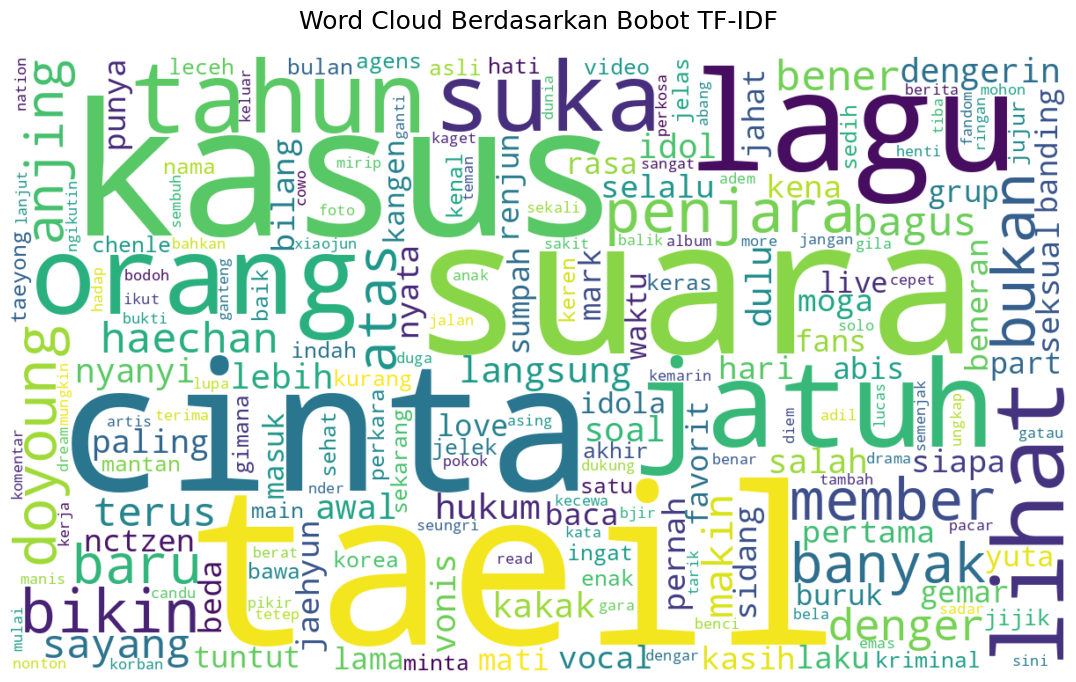

In [ ]:
# word cloud berdasarkan tf-idf
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# baca hasil tf-idf yg di drive
path_tfidf = "/content/drive/MyDrive/PTT 2025/tfidf_taeil_13.csv"
df_tfidf = pd.read_csv(path_tfidf)

# hitung rata-rata setiap kata
tfidf_mean = df_tfidf.mean(axis=0)

# ambil bobot kata tertinggi
tfidf_top = tfidf_mean.sort_values(ascending=False).head(300)

# proses pembuatan word cloud
wordcloud = WordCloud(
    width=1200,
    height=700,
    background_color='white',
    colormap='viridis',       # gradasi warna lembut
    prefer_horizontal=0.8,    # 80% kata akan horizontal
    relative_scaling=0.5,     # keseimbangan ukuran antar kata
    min_font_size=10,
    max_font_size=250,
    collocations=False        # hilangkan pengulangan kata (no overlap)
).generate_from_frequencies(tfidf_top.to_dict())

# tampilkan word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Berdasarkan Bobot TF-IDF", fontsize=18, pad=20)
plt.show()


## Modeling

Beberapa model klasifikasi digunakan untuk melakukan analisis sentimen, yaitu:
- Random Forest
- Decision Tree
- Support Vector Machine (SVM)

Penggunaan beberapa model bertujuan untuk membandingkan performa dan menentukan model yang paling sesuai untuk kasus ini.

In [ ]:
# library utama
import warnings
import pandas as pd
from prettytable import PrettyTable
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# library model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# baca data dari drive
drive.mount('/content/drive')
X_tfidf = pd.read_csv("/content/drive/MyDrive/PTT 2025/tfidf_taeil_13.csv")
df = pd.read_csv("/content/drive/MyDrive/PTT 2025/taeil_tokens_13.csv")
y = df['label']

print("Data berhasil dimuat")
print("Ukuran TF-IDF:", X_tfidf.shape)
print("Jumlah label:", len(y))
print("\n Jumlah data per label:")
print(df['label'].value_counts())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data berhasil dimuat
Ukuran TF-IDF: (959, 1000)
Jumlah label: 959

 Jumlah data per label:
label
1    521
0    438
Name: count, dtype: int64


In [ ]:
# ambil teks bersih dari dataframe
teks = df["kata_dasar"]

# split data (acak, stratified)
X_train, X_test, y_train, y_test, teks_train, teks_test = train_test_split(
    X_tfidf,
    y,
    teks,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# wajib reset index supaya sinkron dengan prediksi
y_test = y_test.reset_index(drop=True)
teks_test = teks_test.reset_index(drop=True)

print("\nData berhasil dibagi")
print("X train:", X_train.shape)
print("X test :", X_test.shape)

print("\nJumlah label di TRAIN:")
print(y_train.value_counts())

print("\nJumlah label di TEST:")
print(y_test.value_counts())



Data berhasil dibagi
X train: (767, 1000)
X test : (192, 1000)

Jumlah label di TRAIN:
label
1    417
0    350
Name: count, dtype: int64

Jumlah label di TEST:
label
1    104
0     88
Name: count, dtype: int64


In [ ]:
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)  # Mengabaikan warning dari metric (misalnya jika ada kelas tidak terprediksi)

# Feature Scaling untuk SVM
# lebih stabil dan optimal
scaler = StandardScaler(with_mean=False)   # StandardScaler menstandarkan fitur; with_mean=False agar aman untuk data sparse (banyak nol)
X_train_scaled = scaler.fit_transform(X_train)  # Fit (pelajari skala dari training set) dan transformasi data latih
X_test_scaled = scaler.transform(X_test)        # Transformasi data uji dengan skala yang sama

# Atur parameter manual untuk masing-masing model
manual_params = {

    # ================= Support Vector Machine (LinearSVC) =================
    "SVM": {
        'C': 0.0001,                # Parameter regularisasi; nilai besar = margin sempit (bisa overfit), kecil = margin lebar (bisa underfit)
        'loss': 'hinge', # Fungsi kerugian; 'squared_hinge' umumnya lebih stabil dan halus dari 'hinge'
        'dual': True,            # Apakah memecahkan masalah dalam bentuk dual; True cocok jika fitur > jumlah sampel
        'max_iter': 10000         # Batas iterasi maksimum agar training konvergen
    },

    # ================= Random Forest =================
    "Random Forest": {
        'n_estimators': 500,     # Jumlah pohon dalam ensemble; lebih banyak pohon = hasil lebih stabil tapi training lebih lama
        'max_depth': None,       # Kedalaman maksimum tiap pohon; None = pohon tumbuh sampai daun murni (risiko overfit)
        'min_samples_split': 4,  # Minimum jumlah sampel di node agar bisa dipecah; nilai besar = model lebih sederhana
        'min_samples_leaf': 2,   # Minimum sampel di daun pohon; menaikkan nilai ini bisa mencegah overfit
        'random_state': 42       # Seed acak agar hasil eksperimen tetap konsisten (reproducible)
    },

    # ================= Decision Tree =================
    "Decision Tree": {
        'criterion': 'entropy',     # Ukuran pemisahan terbaik; 'gini' cepat, 'entropy' (information gain) lebih detail
        'max_depth': None,       # Batas maksimum kedalaman pohon; None = tumbuh sampai semua daun murni
        'min_samples_split': 4,  # Minimum jumlah sampel untuk membagi node; besar = lebih sederhana
        'min_samples_leaf': 2,   # Minimum jumlah sampel per daun; besar = cegah daun kecil (overfit)
        'random_state': 42       # Seed acak agar hasil model stabil
    }
}



# Inisialisasi model
models = {
    "SVM": LinearSVC(**manual_params["SVM"]),
    "Random Forest": RandomForestClassifier(**manual_params["Random Forest"]),
    "Decision Tree": DecisionTreeClassifier(**manual_params["Decision Tree"])
}

# Tabel hasil
results_table = PrettyTable(["Model", "Train Acc", "Test Acc"])
results = {}

# Loop semua model
for name, model in models.items():
    print(f"\nMelatih model: {name}")

    # SVM pakai data scaled
    if name in ["SVM"]:
        model.fit(X_train_scaled, y_train)

        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

    # Random Forest & Decision Tree pakai data asli
    else:
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

    # Hitung akurasi
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    # Simpan hasil
    results[name] = {"train": train_acc, "test": test_acc}

    # Tampilkan hasil per model
    print(f"\n{name} selesai!")
    print("Training Accuracy :", f"{train_acc:.4f}")
    print("Testing Accuracy  :", f"{test_acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test, zero_division=0))

    # Tambahkan ke tabel akhir
    results_table.add_row([
        name,
        f"{train_acc:.4f}",
        f"{test_acc:.4f}"
    ])

# Tampilkan tabel ringkasan
print("\n=== Hasil Perbandingan Model ===")
print(results_table)



Melatih model: SVM

SVM selesai!
Training Accuracy : 0.9896
Testing Accuracy  : 0.9531

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        88
           1       0.93      0.99      0.96       104

    accuracy                           0.95       192
   macro avg       0.96      0.95      0.95       192
weighted avg       0.96      0.95      0.95       192


Melatih model: Random Forest

Random Forest selesai!
Training Accuracy : 0.9987
Testing Accuracy  : 0.9948

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      1.00      1.00       104

    accuracy                           0.99       192
   macro avg       1.00      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192


Melatih model: Decision Tree

Decision Tree selesai!
Training Accuracy : 0.9987
Testing Accuracy  : 0

## Evaluation

Evaluasi model dilakukan menggunakan metrik performa klasifikasi untuk melihat kemampuan model dalam membedakan sentimen positif dan negatif.
Hasil evaluasi digunakan sebagai dasar pemilihan model terbaik.


In [ ]:
# === Perbandingan Akurasi & Prediksi Tiap Model ===
from rich.console import Console              # impor modul untuk menampilkan tabel warna di terminal
from rich.table import Table                  # impor class Table dari rich untuk tampilan tabel
from rich import box                          # impor style box dari rich
from prettytable import PrettyTable           # impor PrettyTable untuk tabel prediksi per baris

console = Console()                           # inisialisasi objek console untuk menampilkan output rich

# === Urutkan hasil berdasarkan akurasi tertinggi ===
sorted_results = dict(sorted(results.items(), key=lambda x: x[1]['test'], reverse=True))
# mengurutkan dictionary hasil (results) berdasarkan nilai akurasi (value) dari tinggi ke rendah

# === Tampilkan hasil perbandingan akurasi antar model ===
table = Table(title="Perbandingan Akurasi Model", box=box.ROUNDED, show_lines=True)
# membuat tabel rich dengan garis luar melengkung dan menampilkan garis antar baris
table.add_column("Model", style="bold cyan", justify="center")
# menambah kolom pertama untuk nama model, teks berwarna cyan dan rata tengah
table.add_column("Parameter", style="red", justify="center")
# kolom kedua untuk parameter model, teks berwarna merah
table.add_column("Benar/Total", style="yellow", justify="center")
# kolom ketiga menunjukkan jumlah prediksi benar dari total data uji
table.add_column("Akurasi (%)", style="bold green", justify="center")
# kolom keempat untuk menampilkan akurasi dalam persen

total = len(y_test)                           # menghitung total data uji

for name, acc_dict in sorted_results.items():      # iterasi tiap model dan akurasinya
    test_acc = acc_dict['test']
    correct = int(test_acc * total)                # menghitung jumlah prediksi benar berdasarkan akurasi
    table.add_row(                            # menambahkan satu baris data ke tabel
        name,                                 # nama model
        str(manual_params[name]),             # parameter model
        f"{correct}/{total}",                 # format jumlah benar dari total data
        f"{test_acc * 100:.2f}%"                   # akurasi dikonversi ke persen dua angka desimal
    )

console.print("\n Hasil Perbandingan Model")
# mencetak judul hasil perbandingan model ke terminal
console.print(table)                          # menampilkan tabel perbandingan akurasi di console

# === Tentukan model terbaik ===
best_model_name = list(sorted_results.keys())[0]   # mengambil nama model dengan akurasi tertinggi
best_acc_dict = sorted_results[best_model_name]
best_acc = best_acc_dict['test']
console.print(f"\n Model terbaik: [bold cyan]{best_model_name}[/bold cyan] dengan akurasi [bold green]{best_acc * 100:.2f}%[/bold green]\n")
# mencetak model terbaik dan akurasinya ke terminal dengan format warna

try:
    predictions = {}

    for name, model in models.items():
        if name in ["Logistic Regression", "SVM"]:
            predictions[name] = model.predict(X_test_scaled)
        else:
            predictions[name] = model.predict(X_test)

    # Tabel prediksi (FIX nama kolom agar sesuai dengan key dictionary)
    table_pred = PrettyTable()
    table_pred.field_names = [
        "No", "Teks Asli", "Label Asli",
        "SVM", "Random Forest", "Decision Tree"
    ]

    # Loop maksimal 30 data
    for i in range(min(30, len(y_test))):
        teks_asli = str(teks_test[i])[:40] + "..."
        label_asli = y_test[i] if not hasattr(y_test, 'iloc') else y_test.iloc[i]

        table_pred.add_row([
            i + 1,
            teks_asli,
            label_asli,
            predictions["SVM"][i],
            predictions["Random Forest"][i],
            predictions["Decision Tree"][i]
        ])

    print("\n Perbandingan Hasil Prediksi Tiap Model (maks 30 data):")
    print(table_pred)

except Exception as e:
    print("\n Tidak dapat menampilkan tabel prediksi (cek variabel teks_test dan urutan datanya).")
    print("Error:", e)


Hasil Perbandingan Model

                                            Perbandingan Akurasi Model                                             
╭───────────────┬─────────────────────────────────────────────────────────────────────┬─────────────┬─────────────╮
│     Model     │                              Parameter                              │ Benar/Total │ Akurasi (%) │
├───────────────┼─────────────────────────────────────────────────────────────────────┼─────────────┼─────────────┤
│ Random Forest │  {'n_estimators': 500, 'max_depth': None, 'min_samples_split': 4,   │   191/192   │   99.48%    │
│               │             'min_samples_leaf': 2, 'random_state': 42}              │             │             │
├───────────────┼─────────────────────────────────────────────────────────────────────┼─────────────┼─────────────┤
│ Decision Tree │ {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 4, │   191/192   │   99.48%    │
│               │             'min_samples_leaf': 2, 'random_state': 42}              │             │             │
├───────────────┼─────────────────────────────────────────────────────────────────────┼─────────────┼─────────────┤
│      SVM      │   {'C': 0.0001, 'loss': 'hinge', 'dual': True, 'max_iter': 10000}   │   183/192   │   95.31%    │
╰───────────────┴─────────────────────────────────────────────────────────────────────┴─────────────┴─────────────╯

Model terbaik: Random Forest dengan akurasi 99.48%


 Perbandingan Hasil Prediksi Tiap Model (maks 30 data):
+----+---------------------------------------------+------------+-----+---------------+---------------+
| No |                  Teks Asli                  | Label Asli | SVM | Random Forest | Decision Tree |
+----+---------------------------------------------+------------+-----+---------------+---------------+
| 1  |             cinta suara taeil...            |     1      |  1  |       1       |       1       |
| 2  | nctzen first idola favorit taeil idola f... |     1      |  1  |       1       |       1       |
| 3  | jujur idola favorit pertama kenal dulu t... |     0      |  1  |       0       |       0       |
| 4  | jangan kasus kaos taeil pikir salah hybe... |     0      |  0  |       0       |       0       |
| 5  | dulu jauh fangirling over suju selalu su... |     1      |  1  |       1       |       1       |
| 6  | cinta taeil laki laki suara emas bikin l... |     1      |  1  |       1       |       1       |
| 7  | 

### percobaaan data baru

In [ ]:
# Uji coba data baru topik Purbaya
kalimat_uji = [
    "taeil jahat. harus masuk penjara",
    "suara taeil bagus banget",
    "taeil cakep hehe",
    "gak nyangka taeil pelaku kasus kaya gitu",
    "kasus taeil gk nyangka bgt sih, taeil era downfall"
]

# === Preprocessing menggunakan pipeline lengkap ===
kalimat_uji_clean = [preprocess_full(k) for k in kalimat_uji]
kalimat_uji_tfidf = vectorizer.transform(kalimat_uji_clean)

# === Prediksi menggunakan semua model ===
from prettytable import PrettyTable

table_pred = PrettyTable()
table_pred.field_names = ["No", "Teks Asli","SVM", "Random Forest", "Decision Tree"]

for i, teks in enumerate(kalimat_uji):
    row = [i + 1, teks[:50] + "..."]  # potong teks biar rapi

    for name, model in models.items():

        # pakai input yg benar (scaled untuk LR & SVM)
        if name in ["SVM"]:
            pred = model.predict(kalimat_uji_tfidf)[i]
        else:
            pred = model.predict(kalimat_uji_tfidf)[i]

        # konversi label angka → teks
        if pred == 1:
            label = "Positif"
        elif pred == 0:
            label = "Negatif"
        else:
            label = pred  # fallback kalau label bukan 0/1

        row.append(label)

    table_pred.add_row(row)

print("\nHASIL PREDIKSI KALIMAT BARU (Semua Model - Topik: Taeil)")
print(table_pred)



HASIL PREDIKSI KALIMAT BARU (Semua Model - Topik: Taeil)
+----+-------------------------------------------------------+---------+---------------+---------------+
| No |                       Teks Asli                       |   SVM   | Random Forest | Decision Tree |
+----+-------------------------------------------------------+---------+---------------+---------------+
| 1  |          taeil jahat. harus masuk penjara...          | Negatif |    Negatif    |    Positif    |
| 2  |              suara taeil bagus banget...              | Positif |    Positif    |    Positif    |
| 3  |                  taeil cakep hehe...                  | Positif |    Positif    |    Positif    |
| 4  |      gak nyangka taeil pelaku kasus kaya gitu...      | Negatif |    Negatif    |    Negatif    |
| 5  | kasus taeil gk nyangka bgt sih, taeil era downfall... | Negatif |    Negatif    |    Negatif    |
+----+-------------------------------------------------------+---------+---------------+--------------

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Insight & Kesimpulan

Berdasarkan hasil evaluasi yang dilakukan, model Random Forest menunjukkan performa terbaik dengan tingkat akurasi sebesar 99.48% dibandingkan dengan model Decision Tree dan SVM. Hal ini mengindikasikan bahwa Random Forest mampu menangkap pola sentimen pada data Twitter dengan lebih stabil untuk kasus analisis sentimen ini.

Selain evaluasi menggunakan data uji, model juga diuji menggunakan beberapa kalimat baru terkait topik yang sama. Hasil prediksi menunjukkan bahwa Random Forest memberikan hasil yang lebih konsisten dibandingkan model lainnya, terutama pada teks dengan sentimen yang jelas maupun ambigu.

Dengan demikian, model Random Forest dipilih sebagai model utama dalam project ini untuk melakukan analisis sentimen positif dan negatif pada data media sosial Twitter.

